In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb



In [2]:
# pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [5]:
#loading data
df=pd.read_csv('https://raw.githubusercontent.com/lastoptn/datasets/main/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# labelEncoding Surname , Geography and Gender Columns
from sklearn.preprocessing import LabelEncoder


In [9]:
le=LabelEncoder()
df['Surname']=le.fit_transform(df['Surname'])
df['Geography']=le.fit_transform(df['Geography'])
df['Gender']=le.fit_transform(df['Gender'])
print(df)

      RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  \
0             1    15634602     1115          619          0       0   42   
1             2    15647311     1177          608          2       0   41   
2             3    15619304     2040          502          0       0   42   
3             4    15701354      289          699          0       0   39   
4             5    15737888     1822          850          2       0   43   
...         ...         ...      ...          ...        ...     ...  ...   
9995       9996    15606229     1999          771          0       1   39   
9996       9997    15569892     1336          516          0       1   35   
9997       9998    15584532     1570          709          0       0   36   
9998       9999    15682355     2345          772          1       1   42   
9999      10000    15628319     2751          792          0       0   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     

In [10]:
#Independent and Dependent Features
X = df.drop(columns=['Exited'])
y = df['Exited']

In [12]:
#Train_Test_Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=108)
print(X_test)

      RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  \
1161       1162    15781802        7          755          0       1   41   
6136       6137    15773071     2404          780          2       0   33   
6955       6956    15697042      985          738          2       1   35   
7995       7996    15803479     2838          708          0       0   67   
95           96    15699461      887          515          2       1   35   
...         ...         ...      ...          ...        ...     ...  ...   
3058       3059    15744279     2127          680          2       0   58   
172         173    15651022     2896          480          1       1   44   
1007       1008    15573086     1807          564          0       1   42   
6055       6056    15623972     2840          479          1       0   23   
2468       2469    15742210     2679          700          0       1   38   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
1161  

In [15]:
#Sequntially create multiple hidden layers and 
#with ReLU activation function design the input layer and Sigmoid Activation function in the output Layer
model=Sequential()
#Input Layer
model.add(Dense(3,activation = 'relu',input_dim=13))
#Output Layer
model.add(Dense(1,activation = 'sigmoid'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 3)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46 (184.00 B)

 Trainable params: 46 (184.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss='binary_crossentropy',optimizer='Adam')
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - loss: 8505976.0000 
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 3019008.7500
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - loss: 206157.2031
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 0.5560
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 0.5424
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - loss: 0.5387
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 0.5225
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - loss: 0.5179
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - loss: 0.5126
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - loss: 0.5134


In [19]:
y_pred = model.predict(X_test)
print(y_pred)
y_pred = np.argmax(y_pred,axis=1)
print(y_pred)



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step
[[0.25632474]
 [0.25632474]
 [0.25632474]
 ...
 [0.25632474]
 [0.25632474]
 [0.25632474]]
[0 0 0 ... 0 0 0]


In [21]:
#confusion matrix and classification_report
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test , y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1574
           1       0.00      0.00      0.00       426

    accuracy                           0.79      2000
   macro avg       0.39      0.50      0.44      2000
weighted avg       0.62      0.79      0.69      2000



/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


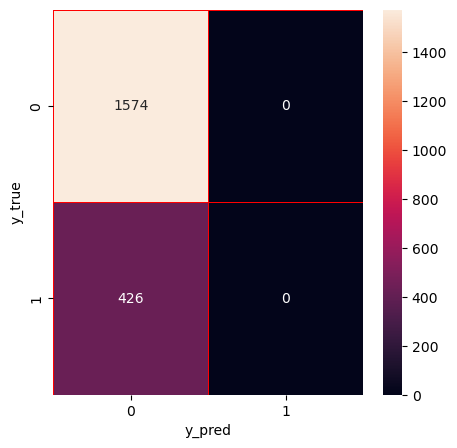

In [23]:
#confusion_matrix_visualization
fig , ax = plt.subplots(figsize=(5,5))
sb.heatmap(cm,annot=True,linewidth=0.5,linecolor='red',fmt='.0f',ax=ax)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()